# Loading Data From Dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
dataset = pd.read_csv('/content/drive/MyDrive/CogNeuro_SeizureDetection/EEG_Dataset.csv')

In [22]:
dataset.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,...,-59,-25,-4,2,5,4,-2,2,20,4


In [23]:
dataset.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


Number of trials for the non-seizure class is: 9200
Number of trials for the seizure class is: 2300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


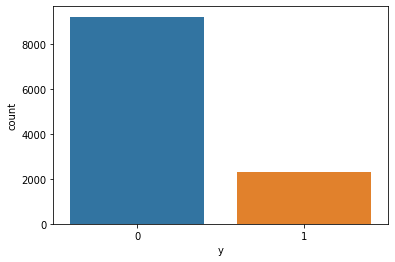

In [24]:
features = dataset.columns
y = dataset.y
y[y>1]=0
ax = sn.countplot(x=y, label = "count")
non_seizure, seizure = y.value_counts()
print('Number of trials for the non-seizure class is:', non_seizure)
print('Number of trials for the seizure class is:', seizure)

In [25]:
dataset.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [26]:
Y = dataset.pop('y')
Y = Y.astype(float)

In [27]:
dataset.pop('Unnamed')
X = dataset.values
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73


# Creating and training model

In [28]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [30]:
model = tf.keras.Sequential([
    layers.Dense(80, input_dim=178, kernel_initializer='uniform', activation='relu'),
    layers.Dense(80, input_dim=80, kernel_initializer='uniform', activation='relu'),
    layers.Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [32]:
history=model.fit(X_train, y_train, epochs=35,shuffle=True,validation_data=(X_test,y_test))

Epoch 1/35
288/288 [==============================] - 3s 6ms/step - loss: 0.4794 - accuracy: 0.8020 - val_loss: 0.4034 - val_accuracy: 0.8283
Epoch 2/35
288/288 [==============================] - 1s 3ms/step - loss: 0.3539 - accuracy: 0.8996 - val_loss: 0.3536 - val_accuracy: 0.9083
Epoch 3/35
288/288 [==============================] - 1s 4ms/step - loss: 0.2973 - accuracy: 0.9275 - val_loss: 0.3356 - val_accuracy: 0.9100
Epoch 4/35
288/288 [==============================] - 1s 3ms/step - loss: 0.2621 - accuracy: 0.9421 - val_loss: 0.2971 - val_accuracy: 0.9383
Epoch 5/35
288/288 [==============================] - 2s 6ms/step - loss: 0.2250 - accuracy: 0.9514 - val_loss: 0.3060 - val_accuracy: 0.9287
Epoch 6/35
288/288 [==============================] - 1s 4ms/step - loss: 0.1993 - accuracy: 0.9575 - val_loss: 0.2772 - val_accuracy: 0.9374
Epoch 7/35
288/288 [==============================] - 1s 4ms/step - loss: 0.1761 - accuracy: 0.9608 - val_loss: 0.2840 - val_accuracy: 0.9365
Epoch 

In [33]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

72/72 - 0s - loss: 0.1920 - accuracy: 0.9557 - 69ms/epoch - 957us/step

Test accuracy: 0.9556521773338318


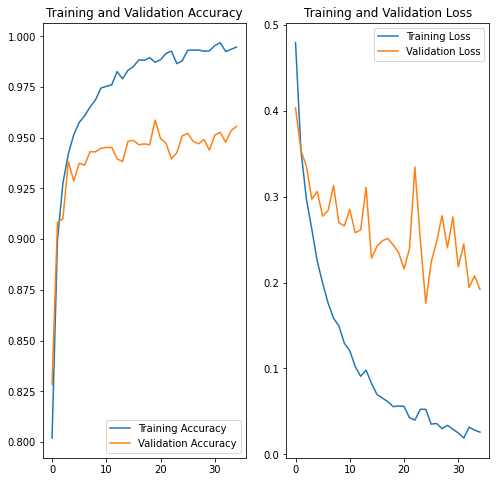

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(35)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()